![Derivation Tree](derivation-tree.jpg)

In [65]:
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [66]:
# read the data from csv file
train_data = np.loadtxt('mnist_train.csv', delimiter=',')

In [75]:
# class for initializing network weights
class Linear_layer:
    def __init__(self, input_size, output_size):
        # forward pass variables
        self.W = 0.2 * random.randn(output_size, input_size)
        self.B = 0.2 * random.randn(output_size, 1)
        self.A0 = np.zeros((input_size, 1))

        # gradients
        self.dA = np.zeros((input_size, 1))
        self.dW = np.zeros((output_size, input_size))
        self.dB = np.zeros((output_size, 1))
        self.dZ = np.zeros((output_size, 1))

    def forward(self, A0):
        # copy the input and store it for gradient computation later
        self.A0 = A0

        # forward pass
        U = np.matmul(self.W, self.A0)
        Z = U + self.B

        return Z

    def backward(self, dZ):
        # compute gradients given the dZ
        self.dB = dZ
        self.dA = np.matmul(np.transpose(self.W), dZ)
        self.dW = np.matmul(dZ, np.transpose(self.A0)) 
            
        # return out dA (ideally to be passed to activation function's backward)
        return self.dA

    def update_weights(self, lr=0.001):
        # update weights
        self.W -= lr * self.dW
        self.B -= lr * self.dB

    

In [76]:
# class for ReLU Activation
class ReLU_layer:
    def __init__(self):
        pass

    def forward(self, input):
        return np.maximum(input, 0)

    def backward(self, input, dP):
        return 1. * (input > 0) * dP

# class for Sigmoid Activation
class Softmax_layer:
    def __init__(self):
        self.output = 0

    def forward(self, input):
        output = np.exp(input - np.max(input))
        self.output = output / np.sum(output)
        return self.output

    def backward(self, dL):
        # https://e2eml.school/softmax.html
        grad = self.output * np.identity(self.output.size) - np.matmul(self.output, np.transpose(self.output))
        return np.matmul(grad, dL)

# class for calculating loss function
class Log_loss:
    def __init__(self):
        self.loss = 0

    def forward(self, input, labels):
        # labels must be -1 to 1
        self.loss = - (np.sum(labels * np.log(input)) + np.sum((1 - labels) * np.log(1 - input)))
        return self.loss

    def backward(self, input, labels):
        term1 = - labels / input
        term2 = (1 - labels) / (1 - input)

        return term1 + term2


In [77]:
# generate the neural network
layer1 = Linear_layer(28*28, 32)
activation1 = ReLU_layer()
layer2 = Linear_layer(32, 10)
activation2 = ReLU_layer()
# layer3 = Linear_layer(100, 10)
# activation3 = ReLU_layer()
output = Softmax_layer()
loss = Log_loss()

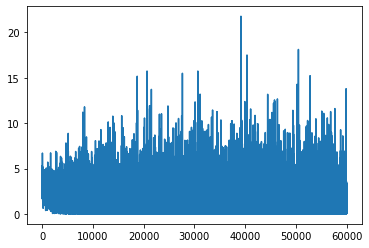

In [78]:
# generate prototype label from which we can populate the one hot vector
label_prototype = np.zeros((10, 1)).astype(float)
losses = []

# training loop
for epoch in range(1):
    # print(epoch)
    for vector in train_data:
        # generate label
        label = label_prototype.copy()
        label[int(vector[0])] = 1.

        # generate input
        input = np.zeros((784, 1))
        input[:, 0] = vector[1:] / 255.

        # feedforward
        inter1 = layer1.forward(input)
        output1 = activation1.forward(inter1)
        inter2 = layer2.forward(output1)
        output2 = activation2.forward(inter2)
        prediction = output.forward(output2)

        # generate loss
        prediction_loss = loss.forward(prediction, label)
        losses.append(prediction_loss)
        # print(prediction_loss)

        # backward through loss
        dL = loss.backward(prediction, label)

        # backward through network
        dP = output.backward(dL)
        dZ2 = activation2.backward(output2, dP)
        dA2 = layer2.backward(dZ2)
        dZ1 = activation1.backward(output1, dA2)
        _ = layer1.backward(dZ1)

        # update weights
        layer1.update_weights()
        layer2.update_weights()

plt.plot(losses)
plt.show()

label = 6; prediction = 0


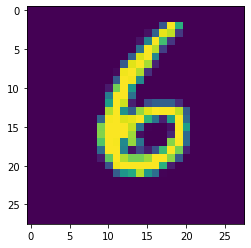

[[0.15157284]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09415227]
 [0.09520898]]


In [81]:
label_prototype = np.zeros((10, 1))

vector = train_data[int(random.rand(1) * 6000)]

# generate label
label = label_prototype.copy()
label[int(vector[0])] = 1.

# generate data vector
data = (vector[1:] + 1e-6) / 255.


# feedforward
inter1 = layer1.forward(input)
output1 = activation1.forward(inter1)
inter2 = layer2.forward(output1)
output2 = activation2.forward(inter2)
prediction = output.forward(output2)

print(f'label = {int(vector[0])}; prediction = {np.argmax(prediction)}')
plt.imshow(data.reshape((28, 28)))
plt.show()
print(prediction)

    
    